In [1]:
# Download the dataset, must use this url not https://github.com/ageron/handson-ml/blob/master/datasets/housing/housing.csv
!wget https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv

--2020-02-12 21:19:41--  https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.03s   

2020-02-12 21:19:42 (51.4 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [0]:
# Import Pandas library
import pandas as pd

# import numpy 
import numpy as np

In [3]:
# read dataset
dataset = pd.read_csv('/content/housing.csv')
dataset = dataset.dropna()
# show first 10 records
dataset.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [0]:
# import matplotlib 
import matplotlib.pyplot as plt

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4175ea8d30>,
      dtype=object)

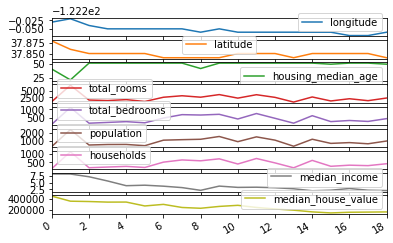

In [5]:
show = dataset.head(19)
show.plot(subplots=True)

In [0]:
# dataset.plot(subplots=True)
# dateset.plot(subplots=True, layout=(3,3))

In [0]:
# import tran_test_split library 
from sklearn.model_selection import train_test_split

In [8]:
# use longitude to median_income to predicate median_house_value
X = dataset.loc[:,"longitude":"median_income"]
Y = dataset["median_house_value"]

X, Y

(       longitude  latitude  ...  households  median_income
 0        -122.23     37.88  ...       126.0         8.3252
 1        -122.22     37.86  ...      1138.0         8.3014
 2        -122.24     37.85  ...       177.0         7.2574
 3        -122.25     37.85  ...       219.0         5.6431
 4        -122.25     37.85  ...       259.0         3.8462
 ...          ...       ...  ...         ...            ...
 20635    -121.09     39.48  ...       330.0         1.5603
 20636    -121.21     39.49  ...       114.0         2.5568
 20637    -121.22     39.43  ...       433.0         1.7000
 20638    -121.32     39.43  ...       349.0         1.8672
 20639    -121.24     39.37  ...       530.0         2.3886
 
 [20433 rows x 8 columns], 0        452600.0
 1        358500.0
 2        352100.0
 3        341300.0
 4        342200.0
            ...   
 20635     78100.0
 20636     77100.0
 20637     92300.0
 20638     84700.0
 20639     89400.0
 Name: median_house_value, Length: 20433, d

In [0]:
# training/testing 70/30
x_train, x_test, y_train, y_test = train_test_split(X ,Y, test_size=0.3)

# convert the datasets to numpy arrays to fit PyTorch model
x_train_np = x_train.to_numpy()
x_test_np = x_test.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

In [0]:
import torch
# import 1d convolution layer
from torch.nn import Conv1d
from torch.nn import MaxPool1d
from torch.nn import Flatten
from torch.nn import Linear
from torch.nn import Dropout
from torch.nn.functional import leaky_relu
from torch.utils.data import DataLoader, TensorDataset

In [0]:
class Cnn_1d(torch.nn.Module):
 def __init__(self, batch_size, inputs, outputs):
  super(Cnn_1d, self).__init__()
  self.batch_size = batch_size
  self.inputs = inputs
  self.outputs = outputs

  # (in_channels, out_channels, kernal_size)
  self.input_layer = Conv1d(inputs, batch_size, 1)
  self.max_pool1 = MaxPool1d(1)
  self.drop1 = Dropout(0.25)
  self.conv = Conv1d(batch_size, 128, 1)
  # self.max_pool2 = MaxPool1d(1)
  # self.drop2 = Dropout(0.5)
  self.flatten = Flatten()
  self.linear1 = Linear(128, 64)
  self.linear2 = Linear(64, 32)
  self.output_layer = Linear(32, outputs)
 
 def forward(self, input):
  input = input.reshape((self.batch_size, self.inputs, 1))
  output = leaky_relu(self.input_layer(input))
  output = self.max_pool1(output)
  output = self.drop1(output)
  output = leaky_relu(self.conv(output))
  # output = self.max_pool2(output)
  # output = self.drop2(output)
  output = self.flatten(output)
  output = self.linear1(output)
  output = self.linear2(output)
  output = self.output_layer(output)

  return output

In [12]:
# training model
# optimizer
from torch.optim import SGD

# performance measure
from torch.nn import L1Loss

!pip install pytorch-ignite
from ignite.contrib.metrics.regression.r2_score import R2Score

     |████████████████████████████████| 112kB 34.0MB/s 


In [13]:
batch_size = 128
model = Cnn_1d(batch_size, X.shape[1],1)
# set the model to use GPU for processing
model.cuda()

Cnn_1d(
  (input_layer): Conv1d(8, 128, kernel_size=(1,), stride=(1,))
  (max_pool1): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (drop1): Dropout(p=0.25, inplace=False)
  (conv): Conv1d(128, 128, kernel_size=(1,), stride=(1,))
  (flatten): Flatten()
  (linear1): Linear(in_features=128, out_features=64, bias=True)
  (linear2): Linear(in_features=64, out_features=32, bias=True)
  (output_layer): Linear(in_features=32, out_features=1, bias=True)
)

In [0]:
def model_loss(model, dataset, train=False, optimizer=None):
 performance = L1Loss()
 score_metric = R2Score()

 avg_loss = 0
 avg_score = 0
 count = 0
 for input, output in iter(dataset):
   predictions = model.forward(input)
   loss = performance(predictions,output)
   score_metric.update([predictions,output])
   score = score_metric.compute()

   if(train):
    #  clear any errors
     optimizer.zero_grad()
     loss.backward()
     optimizer.step()

   avg_loss += loss.item()
   avg_score += score
   count += 1
 return avg_loss / count, avg_score / count

In [0]:
inputs_train = torch.from_numpy(x_train_np).cuda().float()
outputs_train = torch.from_numpy(y_train_np.reshape(y_train_np.shape[0],1)).cuda().float()
inputs_test = torch.from_numpy(x_test_np).cuda().float()
outputs_test = torch.from_numpy(y_test_np.reshape(y_test_np.shape[0],1)).cuda().float()

In [16]:
epochs = 300
optimizer = SGD(model.parameters(),lr=1e-6)

tensor_train = TensorDataset(inputs_train, outputs_train)
loader_train = DataLoader(tensor_train, batch_size, shuffle=True, drop_last=True)
tensor_test = TensorDataset(inputs_test, outputs_test)
loader_test = DataLoader(tensor_test, batch_size, shuffle=True, drop_last=True)

Y_train_loss = []
Y_train_R2 = []
Y_test_loss = []
Y_test_R2 = []
# strat the training loop
for epoch in range(epochs):
  avg_loss, avg_r2_score = model_loss(model, loader_train, train=True, optimizer=optimizer)
  Y_train_loss.append(avg_loss)
  Y_train_R2.append(avg_r2_score)
  avg_loss_test, avg_r2_score_test = model_loss(model, loader_test)
  Y_test_loss.append(avg_loss_test)
  Y_test_R2.append(avg_r2_score_test)

  print('Epoch'+str(epoch+1)+':\n\tLoss='+str(avg_loss)+',\tR2 Score='+str(avg_r2_score)+
        '\t---\ttest_loss='+str(avg_loss_test)+',\tR2_Score_test='+str(avg_r2_score_test))
  

Epoch1:
	Loss=206892.828125,	R2 Score=-3.1896325015907703	---	test_loss=206951.0548537234,	R2_Score_test=-3.299398413534563
Epoch2:
	Loss=206641.89667792793,	R2 Score=-3.1860101261601503	---	test_loss=206652.06117021278,	R2_Score_test=-3.2206881017333364
Epoch3:
	Loss=206359.9075168919,	R2 Score=-3.1947653844790698	---	test_loss=206343.3786569149,	R2_Score_test=-3.234088896292941
Epoch4:
	Loss=205471.95073198198,	R2 Score=-3.193418225226854	---	test_loss=204402.21941489363,	R2_Score_test=-3.1362259914494186
Epoch5:
	Loss=184312.13752815317,	R2 Score=-2.9769511908818616	---	test_loss=119715.25997340426,	R2_Score_test=-1.058101988029049
Epoch6:
	Loss=119310.39674831081,	R2 Score=-1.0216746955320086	---	test_loss=119470.52277260639,	R2_Score_test=-1.069761130505013
Epoch7:
	Loss=118895.71551238738,	R2 Score=-1.067774550742963	---	test_loss=119440.5779587766,	R2_Score_test=-1.1795468803718943
Epoch8:
	Loss=119292.88351632883,	R2 Score=-1.1317871773044423	---	test_loss=119331.01695478724,	R

In [17]:
# save model
torch.save(model,'1094314_1dconv_reg.pth')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Cnn_1d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Text(0, 0.5, 'loss')

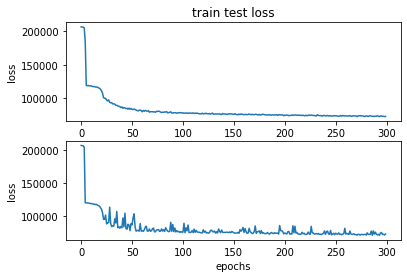

In [18]:
# Y_train_loss,Y_train_R2
# plt1=plt.plot(range(epochs),np.asarray(Y_train_loss),label='train_loss')
# plt2=plt.plot(range(epochs),np.asarray(Y_test_loss),label='test_loss')
plt.subplot(2, 1, 1)
plt.plot(range(epochs),np.asarray(Y_train_loss),label='train_loss')
plt.title('train test loss')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(range(epochs),np.asarray(Y_test_loss),label='test_loss')
plt.xlabel('epochs')
plt.ylabel('loss')

Text(0, 0.5, 'R2_score')

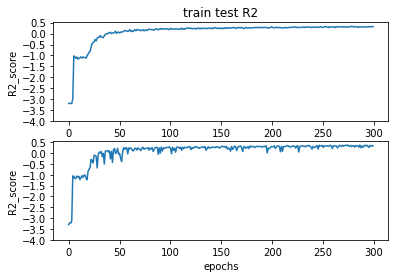

In [19]:
plt.subplot(2, 1, 1)
y_ticks=np.arange(-4,1,0.5)
plt.plot(range(epochs),np.asarray(Y_train_R2),label='train_loss')
plt.yticks(y_ticks)
plt.title('train test R2')
plt.ylabel('R2_score')

plt.subplot(2, 1, 2)
plt.plot(range(epochs),np.asarray(Y_test_R2),label='test_loss')
plt.yticks(y_ticks)
plt.xlabel('epochs')
plt.ylabel('R2_score')